# Prediction Model

In [1]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 217 kB/s 


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='white')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/felipedidier/calculadora_de_aluguel/main/train_test.csv', encoding='utf-8-sig')

In [4]:
df.head()

,Unnamed: 0,price,area,room,bath,garage,neigh
0,0,340000.0,71.0,3.0,3.0,2.0,Zona Leste
1,1,149990.0,41.0,2.0,1.0,1.0,Zona Norte
2,2,152990.0,41.0,2.0,1.0,1.0,Zona Norte
3,3,430000.0,120.0,3.0,5.0,3.0,Zona Leste
4,4,235000.0,55.0,2.0,1.0,1.0,Zona Sul


In [5]:
df = df.drop(columns='Unnamed: 0')

In [7]:
df.shape

(2243, 6)

## Treino e teste

In [30]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [31]:
train.shape

(1794, 6)

In [32]:
test.shape

(449, 6)

## Transformação de dados

In [33]:
feat_num = ['price', 'area', 'room', 'bath', 'garage']
feat_cat = ['neigh']

In [34]:
target = 'price'

### Z-score transformation

In [35]:
z_score = StandardScaler()
def std_z_scale(df,col):
  df[col] = z_score.fit_transform(df[[col]])

In [36]:
for col in feat_num:
  std_z_scale(train, col)
  std_z_scale(test, col)

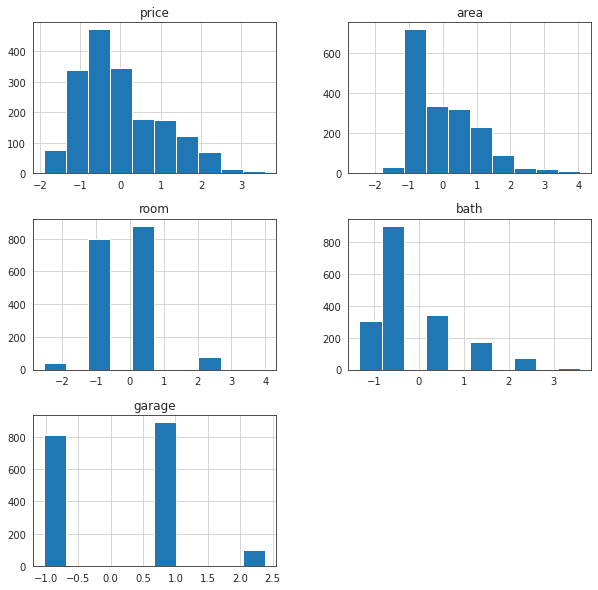

In [37]:
train[feat_num].hist(figsize=(10,10), bins=10)
plt.show()

In [38]:
train.head()

,price,area,room,bath,garage,neigh
1459,0.440380,0.128792,0.726625,0.639990,2.377812,Zona Sul
423,0.136468,0.564740,0.726625,0.639990,0.676258,Zona Sul
1694,-0.597987,-0.910777,-0.900798,-0.341328,-1.025295,Zona Sul
759,-0.522009,-0.877243,-0.900798,-0.341328,0.676258,Zona Leste
1501,-0.471357,0.631809,0.726625,0.639990,0.676258,Zona Sul


In [39]:
train = train.reset_index()
test = test.reset_index()

In [40]:
train = train.drop(columns='index')
test = test.drop(columns='index')

In [41]:
train.head()

,price,area,room,bath,garage,neigh
0,0.440380,0.128792,0.726625,0.639990,2.377812,Zona Sul
1,0.136468,0.564740,0.726625,0.639990,0.676258,Zona Sul
2,-0.597987,-0.910777,-0.900798,-0.341328,-1.025295,Zona Sul
3,-0.522009,-0.877243,-0.900798,-0.341328,0.676258,Zona Leste
4,-0.471357,0.631809,0.726625,0.639990,0.676258,Zona Sul


In [42]:
test.head()

,price,area,room,bath,garage,neigh
0,-0.511830,-0.951389,-0.893820,-0.328410,0.587862,Zona Leste
1,0.329610,-0.270580,0.692446,-0.328410,-1.061826,Zona Sul
2,0.427966,0.137906,0.692446,0.587466,-1.061826,Zona Sul
3,0.870568,0.308108,0.692446,0.587466,0.587862,Zona Sul
4,-1.239168,-1.053510,-0.893820,-1.244287,-1.061826,Zona Norte


## Variável categórica

In [43]:
one_hot = OneHotEncoder()

In [44]:
for col in feat_cat:
  temp = pd.DataFrame(one_hot.fit_transform(train[[col]]).toarray(),columns=one_hot.get_feature_names([col]))
  train = pd.concat([train, temp], axis=1, join='inner')

  temp = pd.DataFrame(one_hot.fit_transform(test[[col]]).toarray(),columns=one_hot.get_feature_names([col]))
  test = pd.concat([test, temp], axis=1, join='inner')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
train.head()

,price,area,room,bath,garage,neigh,neigh_Grande Natal,neigh_Zona Leste,neigh_Zona Norte,neigh_Zona Oeste,neigh_Zona Sul
0,0.440380,0.128792,0.726625,0.639990,2.377812,Zona Sul,0.0,0.0,0.0,0.0,1.0
1,0.136468,0.564740,0.726625,0.639990,0.676258,Zona Sul,0.0,0.0,0.0,0.0,1.0
2,-0.597987,-0.910777,-0.900798,-0.341328,-1.025295,Zona Sul,0.0,0.0,0.0,0.0,1.0
3,-0.522009,-0.877243,-0.900798,-0.341328,0.676258,Zona Leste,0.0,1.0,0.0,0.0,0.0
4,-0.471357,0.631809,0.726625,0.639990,0.676258,Zona Sul,0.0,0.0,0.0,0.0,1.0


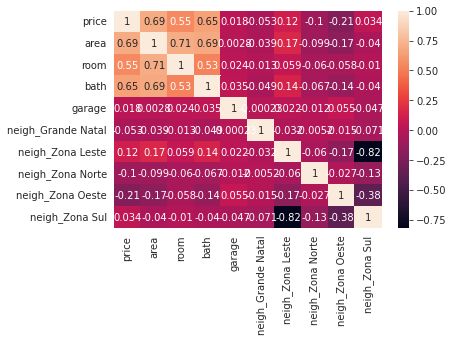

In [46]:
sns.heatmap(train.corr(), annot=True)

## Regressão multipla

In [47]:
select = ['price', 'area', 'room', 'bath']

In [55]:
test = test[select]

In [48]:
train = train[select]

In [49]:
train.head()

,price,area,room,bath
0,0.440380,0.128792,0.726625,0.639990
1,0.136468,0.564740,0.726625,0.639990
2,-0.597987,-0.910777,-0.900798,-0.341328
3,-0.522009,-0.877243,-0.900798,-0.341328
4,-0.471357,0.631809,0.726625,0.639990


In [52]:
model = LinearRegression(fit_intercept=1)

In [53]:
model.fit(train.drop(target, axis=1), train[target])

LinearRegression(fit_intercept=1)

In [56]:
y_pred_train = model.predict(train.drop(target, axis=1))
y_pred_test = model.predict(test.drop(target, axis=1))

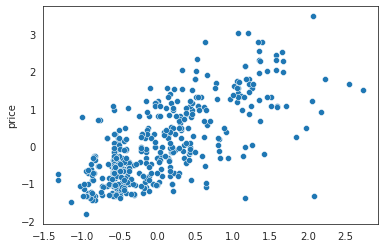

In [57]:
sns.scatterplot(x = y_pred_test, y = test['price']) 

In [58]:
print(model.intercept_)

2.6173839756039517e-16


In [59]:
# Train

mse_lr_train = mean_squared_error(train[target], y_pred_train)
rmse_lr_train = mse_lr_train ** 0.5

# Test
mse_lr = mean_squared_error(test[target], y_pred_test)
rmse_lr = mse_lr ** 0.5

{'train_metric' : np.round([mse_lr_train, rmse_lr_train, r2_score(train[target], y_pred_train)], 3),
'test_metric' : np.round([mse_lr, rmse_lr, r2_score(test[target], y_pred_test)],3)}

{'test_metric': array([0.498, 0.705, 0.502]),
 'train_metric': array([0.454, 0.674, 0.546])}

In [63]:
rfr = RandomForestRegressor()
print(rfr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

RandomForestRegressor()


RandomForestRegressor(criterion='mse', max_depth=5)

In [82]:
rfr.fit(train.drop(target, axis=1), train[target])

score = rfr.score(train.drop(target, axis=1), train[target])
print("Erro quadrado:", score)

Erro quadrado: 0.7905362609514128


In [72]:
ypred = rfr.predict(test.drop(target, axis=1))

In [81]:
# Test
mse_lr = mean_squared_error(test[target], ypred)
rmse_lr = mse_lr ** 0.5

{'test_metric' : np.round([mse_lr, rmse_lr, r2_score(test[target], ypred)],3)}

{'test_metric': array([0.413, 0.643, 0.587])}

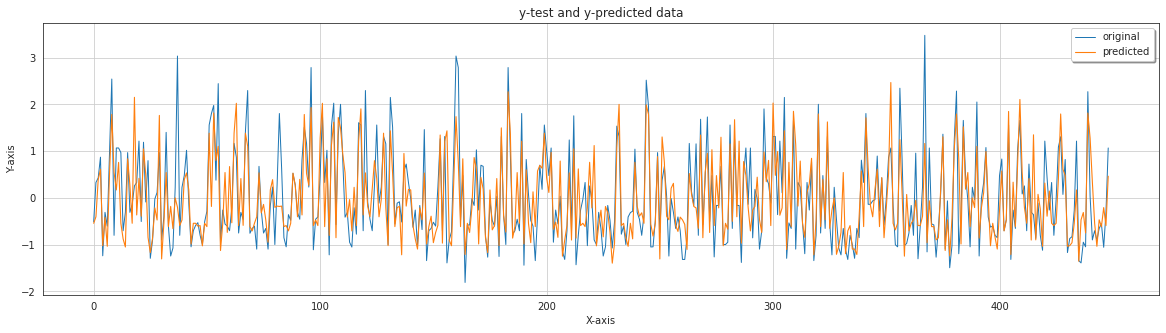

In [77]:
plt.figure(figsize=(20,5))
x_ax = range(len(test['price']))
plt.plot(x_ax, test['price'], linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

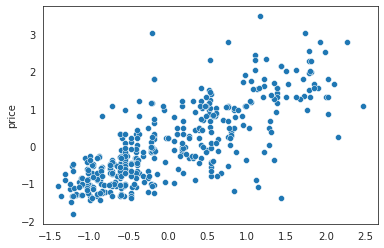

In [80]:
sns.scatterplot(x = ypred, y = test['price']) 